In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import graphinglib as gl
from astropy.io import fits
from tqdm import tqdm
from scipy.optimize import curve_fit
import pyregion

from src.hdu.map import Map
from src.hdu.cube import Cube
from src.hdu.header import Header
from src.hdu.grouped_maps import GroupedMaps
from src.coordinates.celestial_coords import RA, DEC
from src.coordinates.fits_coords import FitsCoords
from src.tools.loki import get_loki_fit_figure
from src.tools.miscellaneous import silence_function

### AGN coordinates

#### High resolution

In [ ]:
hdu = fits.open("data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_1_wicked.fits")[1]
header = Header(hdu.header)

# Non-rotated
agn_world_coords = [RA.from_sexagesimal("12:48:49.2609").degrees, DEC.from_sexagesimal("-41:18:39.417").degrees]
agn_python_coords = header.celestial.world_to_pixel(agn_world_coords)[0]
agn_coords = FitsCoords.from_python(*agn_python_coords)
print(f"AGN position (non-rotated): {agn_coords}")

# Rotated
angle = -48
raise Exception("Use -47 degrees for high res data")
theta = angle * np.pi/180
agn_edge_coords = np.array(agn_coords.data) + 0.5 - 1  # +0.5 for edge coords, -1 since first plotted pixel is at 0, 0
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
agn_rot_coords = rot_matrix @ agn_edge_coords
print(f"AGN position (rotated, x y 0-indexed): {agn_rot_coords}")

In [ ]:
cube = Cube(hdu.data, hdu.header)
map_ = cube[0, :, :]

hm = map_.data.plot
hm.show_color_bar = False
point = gl.Point(57.36808571235344 - 1, 52.3685314021737 - 1)  # plotting starts at 0, 0

fig = gl.SmartFigure(
    size=(6, 6),
    remove_axes=True,
    elements=[hm, point],
).set_visual_params(use_latex=True, font_family="serif").show()
fig.save("test_orig.png", dpi=600)

In [ ]:
cube = Cube(hdu.data, hdu.header)
map_ = cube[0, :, :]

hm = map_.rotate_field()
hm.show_color_bar = False
point = gl.Point(76.59800739181169, -7.554401763860428)

fig = gl.SmartFigure(
    size=(6, 6),
    # remove_axes=True,
    elements=[hm, point],
    x_lim=(38.5, 115.5),
    y_lim=(-47.4, 38.6),
).set_visual_params(use_latex=True, font_family="serif").show()
fig.save("test_rot2.png", dpi=600)

#### Low resolution

In [ ]:
header = Header(fits.open("data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_2_wicked.fits")[1].header)

# Non-rotated
agn_world_coords = [RA.from_sexagesimal("12:48:49.2609").degrees, DEC.from_sexagesimal("-41:18:39.417").degrees]
agn_python_coords = header.celestial.world_to_pixel(agn_world_coords)[0]
agn_coords = FitsCoords.from_python(*agn_python_coords)
print(f"AGN position (non-rotated): {agn_coords}")

# Rotated
angle = -48
theta = angle * np.pi/180
agn_edge_coords = np.array(agn_coords.data) + 0.5 - 1  # +0.5 for edge coords, -1 since first plotted pixel is at 0, 0
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
agn_rot_coords = rot_matrix @ agn_edge_coords
print(f"AGN position (rotated, x y 0-indexed): {agn_rot_coords}")

In [ ]:
hdu = fits.open("data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_2_wicked.fits")[1]
cube = Cube(hdu.data, Header(hdu.header))
map_ = cube[0, :, :]

hm = map_.data.plot
hm.show_color_bar = False
point = gl.Point(29.184042838533113, 26.684265720692814)  # plotting starts at 0, 0

fig = gl.SmartFigure(
    size=(6, 6),
    remove_axes=True,
    elements=[hm, point],
).set_visual_params(use_latex=True, font_family="serif").show()
fig.save("test_orig.png", dpi=600)

In [ ]:
hdu = fits.open("data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_2_wicked.fits")[1]
cube = Cube(hdu.data, Header(hdu.header))
map_ = cube[0, :, :]

hm = map_.rotate_field()
hm.show_color_bar = False
point = gl.Point(40.06434799, -3.86971863)

fig = gl.SmartFigure(
    size=(6, 6),
    remove_axes=True,
    elements=[hm, point],
    x_lim=(20, 60),
    y_lim=(-23, 20),
).set_visual_params(use_latex=True, font_family="serif").show()
fig.save("test_rot.png", dpi=600)

### Optimal figure limits

In [ ]:
# High res
# -48 for high res
# map_ = Map.load("df.fits")
# # hdu = fits.open("data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_1_wicked.fits")[1]
# # map_ = Map(Array2D(hdu.data[2193,:,:]), header=Header(hdu.header).celestial)
# hm = map_.rotate_field()
# fig = gl.SmartFigure(
#     aspect_ratio=1,
#     elements=[hm],
#     remove_x_ticks=True,
#     remove_y_ticks=True,
#     x_lim=(38.5, 115.5),
#     y_lim=(-47.4, 38.6),
# ).save("test.pdf")

In [ ]:
# Low res
hdu_list = fits.open("data/loki/output_NGC4696_G235H_F170LP_full_OQBr_tied/NGC4696_G235H_F170LP_full_OQBr_tied_parameter_maps.fits")
hdu = hdu_list["LINES.H210_S6.VPEAK"]
df_hm = Map(hdu.data, header=hdu.header).rotate_field()
fig = gl.SmartFigure(
    aspect_ratio=1,
    elements=[df_hm],
    remove_x_ticks=True,
    remove_y_ticks=True,
    x_lim=(20, 60.5),
    y_lim=(-24, 19.5),
).save("test.pdf")

### Fit plotting

In [2]:
%matplotlib tk
get_loki_fit_figure(
    "data/loki/output_NGC4696_G235H_F170LP_hires_QOBr_tied_global_f/NGC4696_G235H_F170LP_hires_QOBr_tied_global_f_full_model.fits",
    FitsCoords(57 + 2, 52),
    version=3,
    data_cube_filename="data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_1_wicked.fits",
).show(fullscreen=True)

In [2]:
%matplotlib tk
get_loki_fit_figure(
    "data/loki/output_NGC4696_G235H_F170LP_full_OQBr_tied/NGC4696_G235H_F170LP_full_OQBr_tied_full_model.fits",
    FitsCoords(30, 30),
    version=3,
).show(fullscreen=True)

### Reduction

In [5]:
# data = fits.open("data/wicked/f170lp_g235h-f170lp_s3d.fits")[1].data[:-3]  # high resolution data
# cube = Cube.load("data/wicked/f170lp_g235h-f170lp_s3d_choiclip1_2_wicked.fits", 1)  # low resolution data
cube = Cube.load("f170lp_g235h-f170lp_s3d_choiclip1_1 (1).fits", 1)  # low resolution data
cube = cube.get_masked_region(pyregion.open("data/wicked/confidence_region_low_res.reg"))  # confidence region mask
data = cube.data
print(data.shape)
# hm_data = gl.Heatmap(data[0], origin_position="lower")
# %matplotlib tk
# gl.SmartFigure(elements=[hm_data]).show()

(3814, 57, 57)


Set DATE-AVG to '2025-06-05T03:01:04.882' from MJD-AVG.
Set DATE-END to '2025-06-05T05:04:12.748' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [6]:
# Iterate over each spaxel and fit a linear function to detect spikes
spikes = np.full(data.shape, np.nan)
sigma_threshold = 10

for i in tqdm(range(data.shape[1])):
    for j in range(data.shape[2]):
        # i, j = 19, 34
        spectrum = data[:, i, j]

        spectrum_arange = np.arange(spectrum.size)
        valid_mask = ~np.isnan(spectrum)

        if np.sum(valid_mask) < 100:  # Need at least 100 points for meaningful fit
            continue

        wavelength_indices = np.arange(data.shape[0])[valid_mask]
        valid_spectrum = spectrum[valid_mask]

        # Fit linear function
        coeffs = silence_function(lambda: np.polyfit(wavelength_indices, valid_spectrum, 20))()
        fit = np.poly1d(coeffs)
        residuals = spectrum - fit(spectrum_arange)

        # Detect spikes
        sigma = np.nanstd(residuals)
        spike_threshold = sigma_threshold * sigma
        spike_mask = np.abs(residuals) > spike_threshold
        spikes[:, i, j] = spike_mask.astype(int)  # given in 0-indexed coords!
        # gl.SmartFigure(elements=[
        #     gl.Curve(spectrum_arange, spectrum, label="Spectrum"),
        #     gl.Curve(spectrum_arange, fit(spectrum_arange), label="Fit"),
        # ]).show()
        # raise

spike_cube = Cube(spikes, cube.header.copy())
spike_cube.header["COMMENT"] = f"Spikes detected with a threshold of {sigma_threshold} sigma."
spike_cube.save("spikes_detected_2.fits")
spike_cube.get_deep_frame().save("spikes_detected_n_2.fits")
# Visualize spaxels with spikes
# hm_spikes = spike_cube.get_deep_frame().data.plot
# %matplotlib tk
# fig = gl.SmartFigure(
#     aspect_ratio=1,
#     size=(8, 6),
#     elements=[hm_spikes],
# ).set_visual_params(use_latex=True, font_family="serif").show()

100%|██████████| 57/57 [00:02<00:00, 22.26it/s]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


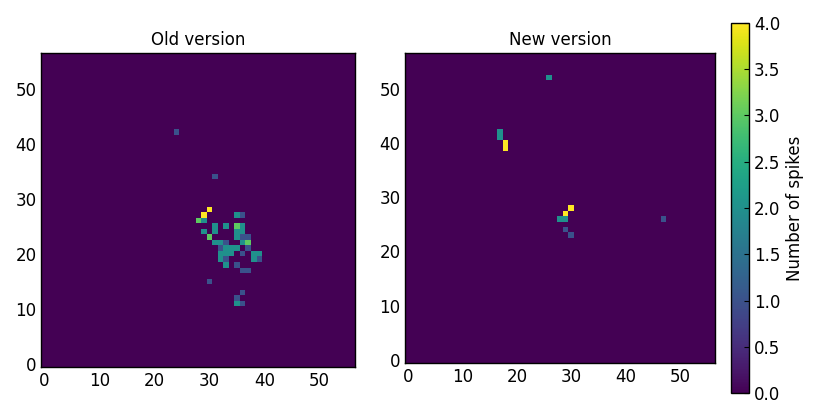

In [16]:
hms = [Map.load(f"spikes_detected_n{f}.fits").data.plot for f in ["", "_2"]]
hms[0].show_color_bar = False
hms[1].set_color_bar_params(label="Number of spikes")
# for hm in hms:
#     hm.
fig = gl.SmartFigure(
    num_cols=2,
    aspect_ratio=1,
    size=(8, 4),
    width_ratios=[1, 1.25],
    reference_labels=False,
    subtitles=["Old version", "New version"],
    elements=hms,
)
fig.show().save("n_spikes.png", dpi=600)

Set DATE-AVG to '2025-06-05T03:01:04.882' from MJD-AVG.
Set DATE-END to '2025-06-05T05:04:12.748' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(3814, 109, 109)


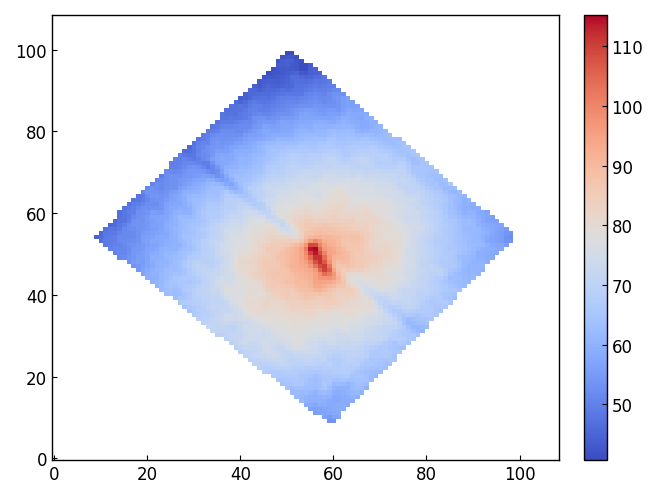

In [2]:
cube = Cube.load("f170lp_g235h-f170lp_s3d_choiclip1_1.fits", 1)  # low resolution data
cube = cube.get_masked_region(pyregion.open("data/wicked/confidence_region_high_res.reg"))  # confidence region mask
data = cube.data
print(data.shape)
hm_data = gl.Heatmap(data[0], origin_position="lower")
# %matplotlib tk
gl.SmartFigure(elements=[hm_data]).show()

In [3]:
# Iterate over each spaxel and fit a linear function to detect spikes
spikes = np.full(data.shape, np.nan)
sigma_threshold = 10

for i in tqdm(range(data.shape[1])):
    for j in range(data.shape[2]):
        # i, j = 19, 34
        spectrum = data[:, i, j]

        spectrum_arange = np.arange(spectrum.size)
        valid_mask = ~np.isnan(spectrum)

        if np.sum(valid_mask) < 100:  # Need at least 100 points for meaningful fit
            continue

        wavelength_indices = np.arange(data.shape[0])[valid_mask]
        valid_spectrum = spectrum[valid_mask]

        # Fit linear function
        coeffs = silence_function(lambda: np.polyfit(wavelength_indices, valid_spectrum, 20))()
        fit = np.poly1d(coeffs)
        residuals = spectrum - fit(spectrum_arange)

        # Detect spikes
        sigma = np.nanstd(residuals)
        spike_threshold = sigma_threshold * sigma
        spike_mask = np.abs(residuals) > spike_threshold
        spikes[:, i, j] = spike_mask.astype(int)  # given in 0-indexed coords!
        # gl.SmartFigure(elements=[
        #     gl.Curve(spectrum_arange, spectrum, label="Spectrum"),
        #     gl.Curve(spectrum_arange, fit(spectrum_arange), label="Fit"),
        # ]).show()
        # raise

spike_cube = Cube(spikes, cube.header.copy())
spike_cube.header["COMMENT"] = f"Spikes detected with a threshold of {sigma_threshold} sigma."
spike_cube.save("spikes_detected_3.fits")
spike_cube.get_deep_frame().save("spikes_detected_n_3.fits")
# Visualize spaxels with spikes
# hm_spikes = spike_cube.get_deep_frame().data.plot
# %matplotlib tk
# fig = gl.SmartFigure(
#     aspect_ratio=1,
#     size=(8, 6),
#     elements=[hm_spikes],
# ).set_visual_params(use_latex=True, font_family="serif").show()

100%|██████████| 109/109 [00:08<00:00, 13.61it/s]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.562604 from OBSGEO-[XYZ].
Set OBSGEO-H to 1731901716.684 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


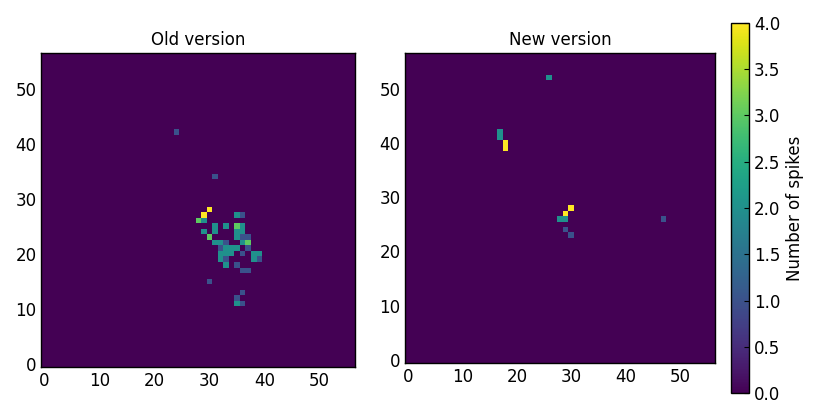

In [ ]:
hms = [Map.load(f"spikes_detected_n{f}.fits").data.plot for f in ["", "_2"]]
hms[0].show_color_bar = False
hms[1].set_color_bar_params(label="Number of spikes")
# for hm in hms:
#     hm.
fig = gl.SmartFigure(
    num_cols=2,
    aspect_ratio=1,
    size=(8, 4),
    width_ratios=[1, 1.25],
    reference_labels=False,
    subtitles=["Old version", "New version"],
    elements=hms,
)
fig.show().save("n_spikes.png", dpi=600)

#### Previous spatial tests

In [ ]:
def gaussian_2d(xy, a, x_0, y_0, sigma_x, sigma_y):
    x, y = xy
    gauss = a * np.exp(-(((x - x_0) ** 2) / (2 * sigma_x ** 2) + ((y - y_0) ** 2) / (2 * sigma_y ** 2)))
    return gauss

model = lambda x, *params: gaussian_2d(x, *params[:5]) + gaussian_2d(x, *params[5:10])

residues = []
y_indices, x_indices = np.indices(data.shape[1:])
x_data = x_indices.flatten()
y_data = y_indices.flatten()
initial_guess = [80, 57, 47, 40, 40,
                 30, 57, 47, 3,  3]
for z in tqdm(range(data.shape[0])):
    z=3345
    slice_ = data[z, :, :]
    z_data = slice_.flatten()

    try:
        popt, pcov = curve_fit(model, (x_data, y_data), z_data, p0=initial_guess, nan_policy="omit", maxfev=10000)
        residues.append(slice_ - model((x_indices, y_indices), *popt).reshape(slice_.shape))
    except RuntimeError:
        residues.append(np.full(slice_.shape, np.nan))

    # if True:
    #     # hm1 = gl.Heatmap(slice_)
    #     # hm2 = gl.Heatmap(model((x_indices, y_indices), *popt).reshape(slice_.shape))
    #     # hm3 = gl.Heatmap(slice_ - model((x_indices, y_indices), *popt).reshape(slice_.shape))
    #     # %matplotlib tk
    #     # gl.SmartFigure(elements=[hm1, hm2, hm3], num_cols=3, size=(14, 4)).show()
    #     # plot the result for a line:
    #     nan_mask = ~np.isnan(slice_[54, :])
    #     curve = gl.Curve(np.arange(slice_.shape[1])[nan_mask], slice_[54, :][nan_mask])
    #     fit_y = model((x_data, y_data), *popt)
    #     fit_y_2d = fit_y.reshape(slice_.shape)
    #     fit_curve = gl.Curve(np.arange(slice_.shape[1]), fit_y_2d[54, :])
    #     gl.SmartFigure(elements=[curve, fit_curve]).show()#.save("example.png", dpi=600)
    #     residues_arr = np.array(residues)
    #     means = np.nanmean(residues_arr, axis=(1, 2))
    #     stddev = np.nanstd(residues_arr, axis=(1, 2))
    #     threshold = means + 10 * stddev
    #     detections = np.where(residues_arr > threshold[:, None, None], 1, np.nan)
    #     slices_detected = np.where(np.any(~np.isnan(detections), axis=(1, 2)))[0]
    #     print(slices_detected)

    #     raise

In [ ]:
residues_arr = np.array(residues)
means = np.nanmean(residues_arr, axis=(1, 2))
stddev = np.nanstd(residues_arr, axis=(1, 2))
threshold = means + 10 * stddev
detections = np.where(residues_arr > threshold[:, None, None], 1, np.nan)
# hm = gl.Heatmap(detections[135])
# gl.SmartFigure(elements=[hm]).show()

# Cube(detections).save("detections.fits")

slices_detected = np.where(np.any(~np.isnan(detections), axis=(1, 2)))[0]
np.savetxt("slices_with_detections.txt", slices_detected.T + 1, fmt="%d")
